In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['tableau-colorblind10'])
# %matplotlib notebook  # другой вариант
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
# Доступные стили
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
import scipy as sp
sp.__version__

'1.16.3'

### Пример 1:

In [27]:
import numpy as np
from math import comb

def derivative(f, x, n=1, h=1e-5):
    """
    n-я производная функции f в точке x
    центральные конечные разности
    """
    result = 0.0
    for k in range(n + 1):
        result += ((-1)**k * comb(n, k) * f(x + (n/2 - k) * h))
    return result / (h**n)

Посчитайте значение 1-ой и 2-ой производной функции:
$f(x) = x^5 + 4sin(2x) + cos(3x+3)$ в точке x = 1

In [29]:
def f(x):
    return np.power(x,5) + 4*np.sin(2*x) + np.cos(3*x + 3)

print('Значение 1-ой производной функции в точке 1 равна {}'.format(derivative(f, 1.0, n=1, h=15)))
print('значение 2-ой производной функции в точке 1 равна {}'.format(derivative(f, 1.0, n=2, h=15)))

Значение 1-ой производной функции в точке 1 равна 3731.4000219974387
значение 2-ой производной функции в точке 1 равна 2269.9686051587237


---

### Пример 2:

Постройте график первой и второй производной функции $sin^2(2x+1)$ на отрезке [-5; 5]

In [31]:
from sympy import diff, Symbol, cos, sin 
x = Symbol('x')     
dfdx = diff(np.power(sin(2 * x + 1), 2))
dfdx

4*sin(2*x + 1)*cos(2*x + 1)

In [32]:
d2fdx2 = diff(dfdx)
d2fdx2

-8*sin(2*x + 1)**2 + 8*cos(2*x + 1)**2

##### Построим график первой производной:

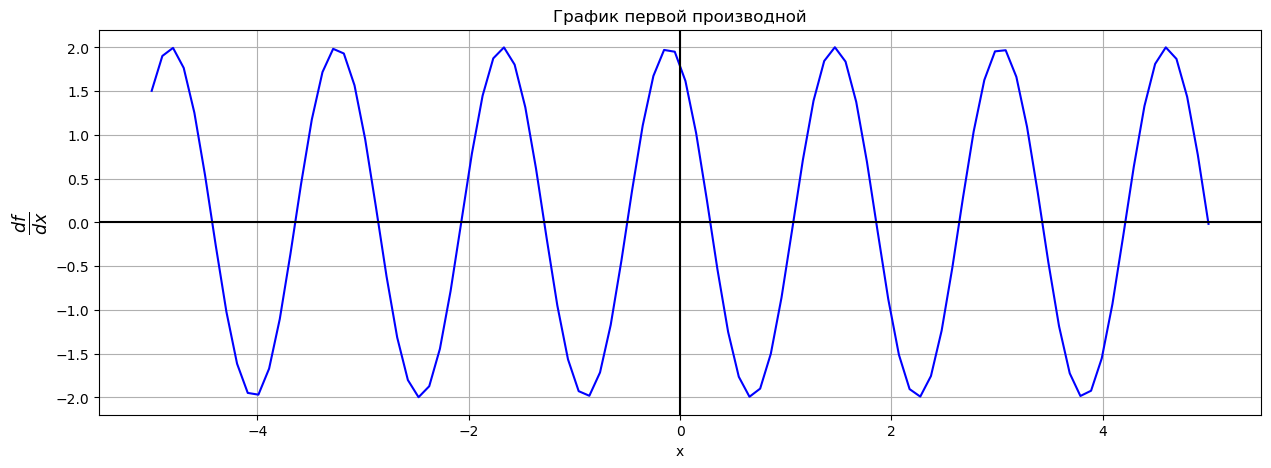

In [9]:
plt.figure(figsize=(15,5))  # Размер графика в дюймах
x = np.linspace(-5.0, 5.0, 100)   # интервал от [-5 до 5], который состоит из 100 точке, края включительно
y = 4 * np.sin(2 * x + 1) * np.cos(2 * x + 1)
plt.plot(x, y, color='blue')
plt.axvline(0, color='black')  # рисуем вертикальную линию с координатой 0 по оси X
plt.axhline(0, color='black')  # рисуем горизонтальную линию с координатой 0 по оси Y
plt.title('График первой производной')
plt.ylabel(r'$\frac{df}{dx}$', fontsize=18)  # Метка для оси Y
plt.xlabel('x');                             # Метка для оси X 
plt.grid();

##### Построим график второй производной:

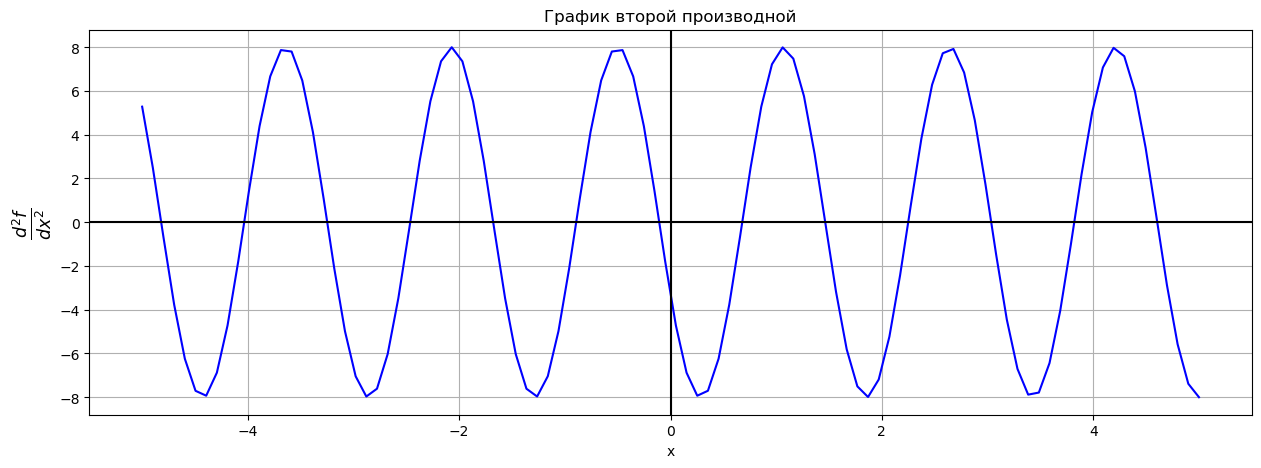

In [10]:
plt.figure(figsize=(15,5))
x = np.linspace(-5.0, 5.0, 100)
y = -8 * np.sin(2 * x + 1)**2 + 8 * np.cos(2 * x + 1)**2
plt.plot(x, y, color='b')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.title('График второй производной')
plt.ylabel(r'$\frac{d^2f}{ dx^2}$', fontsize=18)
plt.xlabel('x')
plt.grid();

### Второй способ построения графиков производных:

In [34]:
def f(x):
    return np.power(np.sin(2*x+1), 2)
derivative(f, 1.0, h=1e-6)

np.float64(-0.5588309964707494)

In [35]:
x = np.linspace(-5.0, 5.0, 100)
fx = f(x)
f1x = derivative(f, x, h=1e-6, n=1) ## Первая производная
f2x = derivative(f, x, h=1e-6, n=2) ## Вторая производная

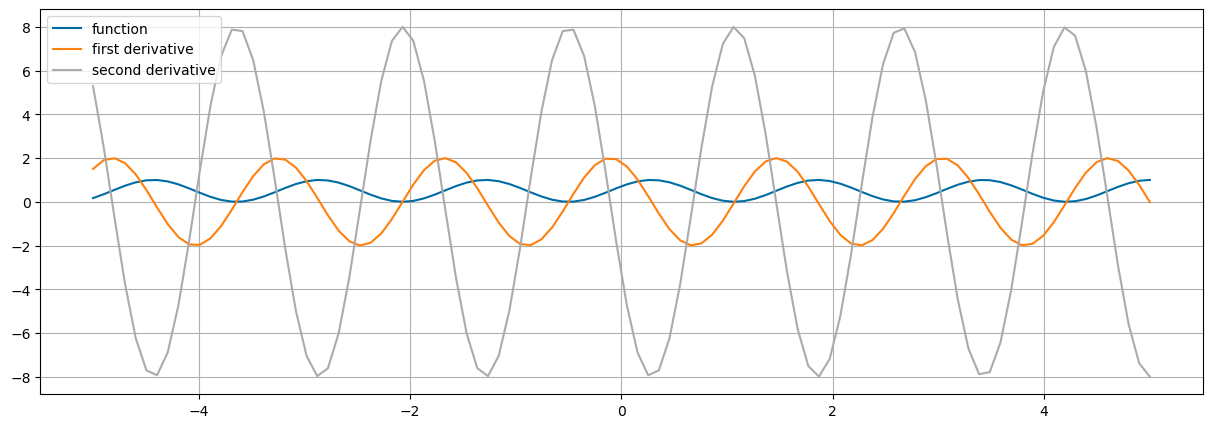

In [36]:
plt.figure(figsize=(15,5))
plt.plot(x, fx, label='function')
plt.plot(x, f1x, label='first derivative')
plt.plot(x, f2x, label='second derivative')
plt.legend()
plt.grid();
plt.savefig("three_funcs.pdf", dpi=300)  # Сохраняем график с помощью matplotlib
# plt.show();  # для .py файлов этот вызов обязателен!

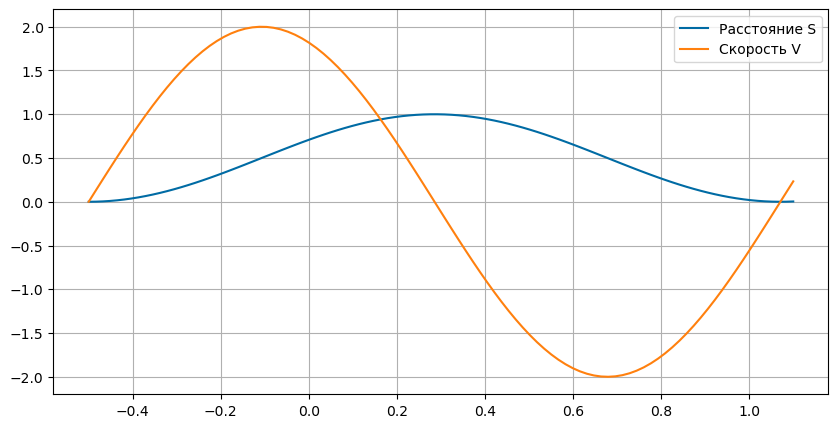

In [38]:
plt.figure(figsize=(10,5))
x = np.linspace(-0.5, 1.1, 100)
fx = f(x)
f1x = derivative(f, x, h=1e-6, n=1) ## Первая производная
# f2x = derivative(f, x, dx=1e-6, n=2)
plt.plot(x, fx, label='Расстояние S')
plt.plot(x, f1x, label='Скорость V')
# plt.plot(x, f2x, label='second derivative')
plt.legend()
plt.grid();
plt.savefig("three_funcs.pdf", dpi=300)  # Сохраняем график с помощью matplotlib
# plt.show();  # для .py файлов этот вызов обязателен!

---